In [1]:
# from sklearn.datasets import fetch_mldata
from joblib import dump , load
# mnist = fetch_mldata("MNIST original")
mnist = load("mnist_dataset.pkl")

In [2]:
from sklearn.externals import joblib

joblib.dump(mnist , "mnist_dataset.pkl")

c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['mnist_dataset.pkl']

In [3]:
%matplotlib inline
x,y = mnist["data"] , mnist["target"]


In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib.pyplot as plt
import matplotlib
some_digit = x[36000]
some_digit_image = some_digit.reshape(28,28)
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  86, 131, 225, 225, 225,   0,   0,
          0,   0],
       [  

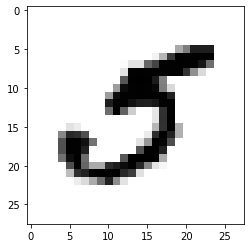

In [7]:
plt.imshow(some_digit_image , cmap=matplotlib.cm.binary , interpolation="nearest")
# plt.axis("off")

In [8]:
y[1800]

0.0

In [9]:
x_train , x_test , y_train , y_test = x[:60000] , x[60000:] , y[:60000] , y[60000:]

In [10]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train , y_train = x_train[shuffle_index] , y_train[shuffle_index]

# implementing cross-validation

In [11]:
y_train_5 = (y_train==5)
y_test_5= (y_test==5)


from sklearn.linear_model import SGDClassifier





sgd_classifier = SGDClassifier(random_state= 42)
sgd_classifier.fit(x_train,y_train_5)
sgd_classifier.predict([some_digit])


array([ True])

In [12]:
sgd_classifier.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [14]:
skfolds = StratifiedKFold(n_splits=3 , random_state=42)

for train_index , test_index in skfolds.split(x_train , y_train_5):
    print(len(train_index), len(test_index))
    clone_clf = clone(sgd_classifier)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    x_test_folds = x_train[test_index]
    y_test_folds =(y_train_5[test_index])
    
    clone_clf.fit(x_train_folds , y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    no_correct = sum(y_pred == y_test_folds)
    print(no_correct/len(y_pred))


40000 20000
0.9622
40000 20000
0.913
40000 20000
0.96655


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5 , clone_clf.predict(x_train))

array([[54243,   336],
       [ 1401,  4020]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score , recall_score




recall_score(y_train_5 , clone_clf.predict(x_train))


0.7415605976757056

In [17]:
precision_score(y_train_5 , clone_clf.predict(x_train))


0.9228650137741047

In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_5 , clone_clf.predict(x_train))

0.822338140533906

In [19]:
y_score = sgd_classifier.decision_function([some_digit])
y_score

array([1062.79719223])

In [20]:
threshold = 0

y_some_digit_Prediction = (y_score > threshold)
y_some_digit_Prediction

array([ True])

In [21]:
threshold = 2000

y_some_digit_Prediction = (y_score > threshold)
y_some_digit_Prediction

array([False])

In [22]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_classifier , x_train , y_train_5 , cv=3 , method= "decision_function")

In [23]:
from sklearn.metrics import precision_recall_curve

precision, recall , thresholds = precision_recall_curve(y_train_5 , y_scores)

In [24]:
def plot_precision_threshold_curve(precision ,recall , thresholds):
    plt.plot(thresholds , precision[:-1] , "b--" , label= "precision")
    plt.plot(thresholds , recall[:-1] , "g-" , label= "recall")
    plt.xlabel("thresholds")
    plt.ylim([0,1])
    plt.legend(loc = "upper left")

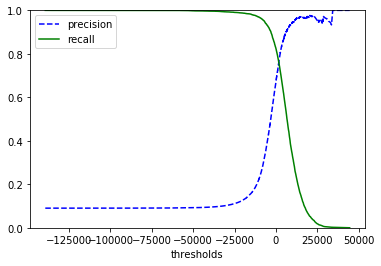

In [25]:
plot_precision_threshold_curve(precision , recall , thresholds)
plt.show()

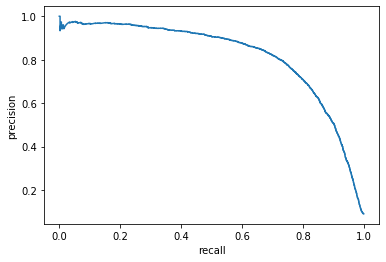

In [26]:
plt.plot(recall , precision )
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()




In [27]:
from sklearn.metrics import roc_curve


false_pos_rate , true_pos_rate , thresholds = roc_curve(y_train_5 , y_scores)

In [28]:
def roc_curve_plot(fpr, tpr ,label = None ):
    plt.plot(fpr , tpr , linewidth =2 , label=None)
    plt.plot([0,1] , [0,1] , "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("false_pos_rate")
    plt.ylabel("true_pos_rate")
    plt.show()

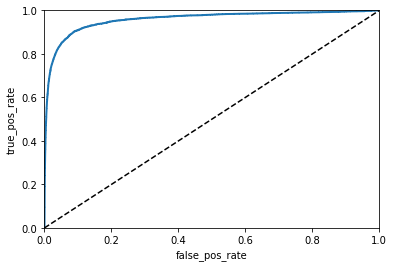

In [29]:
roc_curve_plot(false_pos_rate , true_pos_rate)

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9586548554137085

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(random_state=42)
forest_classifier.fit(x_train , y_train_5)


c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
forest_classifier.predict(x_train)

array([False, False, False, ..., False, False, False])

In [33]:
y_prob_forest = cross_val_predict(forest_classifier , x_train ,y_train_5 , cv=3 , method="predict_proba")

In [34]:
y_scores_forest = y_prob_forest[: , 1]
false_pos_rate_forest , true_pos_rate_forest , thresholds_forest = roc_curve(y_train_5 , y_scores_forest)

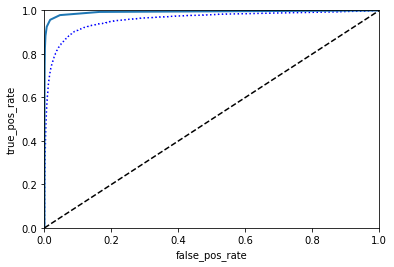

In [35]:
plt.plot(false_pos_rate , true_pos_rate , "b:" , label = "sgd_classifier")
roc_curve_plot(false_pos_rate_forest , true_pos_rate_forest ,"RandomForestClassifier")
# plt.legend(loc = "lower right")
plt.show()

In [36]:
roc_auc_score(y_train_5 , y_scores_forest)

0.9929573171688983

In [37]:
# precision_score(y_train_5 , y_scores_forest)

In [38]:
confusion_matrix(y_train_5 , forest_classifier.predict(x_train))

array([[54578,     1],
       [   43,  5378]], dtype=int64)

# multiclass classification

In [39]:
# sgd_classifier.fit(x_train , y_train)
# sgd_classifier.predict([some_digit])

KeyboardInterrupt: 

In [ ]:
some_digit_scores_multi = sgd_classifier.decision_function([some_digit])
some_digit_scores_multi

In [ ]:
import numpy as np

np.argmax(some_digit_scores_multi)

In [ ]:
sgd_classifier.classes_

In [ ]:
from sklearn.multiclass import OneVsOneClassifier ,OneVsRestClassifier

ovo_classifier = OneVsOneClassifier(sgd_classifier)
ovo_classifier.fit(x_train , y_train)

In [ ]:
ovo_classifier.predict([some_digit])

In [ ]:
joblib.dump(ovo_classifier , "onevone.pkl")

In [ ]:
joblib.dump(sgd_classifier , "multiclasssgd.pkl")

In [ ]:
joblib.dump(forest_classifier , "forest_binary.pkl")

In [ ]:
ovo_classifier_forest = OneVsOneClassifier(forest_classifier)
ovo_classifier_forest.fit(x_train , y_train)

In [ ]:
joblib.dump(ovo_classifier_forest , "forest_ovo.pkl")

In [ ]:
len(ovo_classifier.estimators_)

In [ ]:
forest_classifier.fit(x_train , y_train)
forest_classifier.predict([some_digit])

In [ ]:
forest_classifier.predict_proba([some_digit])

# testing of classifiers

In [ ]:
from sklearn.model_selection import cross_val_score

new_sgd_class = SGDClassifier(random_state=42)

cross_val_score(new_sgd_class , x_train , y_train , cv=3, scoring= "accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar =StandardScaler()
x_train_scaled = scalar.fit_transform(x_train.astype(np.float64))

In [ ]:
# cross_val_score(new_sgd_class , x_train_scaled , y_train , cv=3, scoring ="accuracy")

In [ ]:
y_train_pred = cross_val_predict(sgd_classifier , x_train_scaled , y_train ,cv=3)

In [ ]:
conf_matrix = confusion_matrix(y_train , y_train_pred)
conf_matrix

In [ ]:
plt.matshow(conf_matrix , cmap = plt.cm.gray)

In [ ]:
rows_sum = conf_matrix.sum(axis=1 ,keepdims = True)

In [ ]:
rows_sum

In [ ]:
norm_conf_matrix = conf_matrix/rows_sum
norm_conf_matrix

In [ ]:
np.fill_diagonal(norm_conf_matrix , 0)
plt.matshow(norm_conf_matrix , cmap = plt.cm.gray)

In [ ]:
##plotting 5 and 3

In [ ]:
# class_of_3 , class_of_5 = 3,5

# x_aa = x_train[(y_train == class_of_3) & (y_train_pred == class_of_3)]
# x_ab = x_train[(y_train == class_of_3) & (y_train_pred == class_of_5)]
# x_ba = x_train[(y_train == class_of_5) & (y_train_pred == class_of_3)]
# x_bb = x_train[(y_train == class_of_5) & (y_train_pred == class_of_5)]


# plt.figure(figsize=(8,8))
# plt.subplot(221); plot_digits(x_aa[:25] , images_per_row =25) 
# plt.subplot(222); plot_digits(x_ab[:25] , images_per_row =25) 
# plt.subplot(223); plot_digits(x_ba[:25] , images_per_row =25) 
# plt.subplot(224); plot_digits(x_[:25] , images_per_row =25) 

# multilabel classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>7)
y_train_odd = (y_train%2 ==1)
y_multilabel = np.c_[y_train_large , y_train_odd]


knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train , y_multilabel)

In [ ]:
joblib.dump(knn_clf , "knn_clf_multilabel.pkl")

In [ ]:
knn_clf.predict([x[1800]])

In [ ]:
# y_train_knn_pred = cross_val_predict(knn_clf , x_train ,y_multilabel ,cv=3)
# y_train_knn_pred = knn_clf.predict(x_train)

In [ ]:
# f1_score(y_train , y_train_knn_pred , average= "macro")

# MULTIOUTPUT CLASSIFICATION

In [46]:
# import numpy as np 
# import random as rnd

In [49]:
# noise = np.random.randint(0,100 , (len(x_train)) , 784)
# noise_test = np.random.randint(0,100,(len(x_test)) , 784)